### Kinetics experiment

k=6 l/mol/min at 298K
E=42000 kJ/mol

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

**Find ko to get the Arhenius expression**

In [24]:
k25=6
E=42000
R=8.314
T=25+273
ko=k25/(np.exp(-E/R/T))

In [168]:
k22=ko*np.exp(-E/R/(273+22))
k22

5.049884795213245

**Simulation below will start at 22C and increase with 1.5C per hour.**


In [163]:
To=22
delT=1.5 #assuming 1.5C increase per hour
Cao=0.02 #NaoH
Cbo=0.04
V=0.15

**Below the pump flowrate changes and the associated time of change**

In [164]:
Q1=0.1 #L/min
Q2=0
Q3=0.03
Q4=0.005

t1=15  #min
t2=70
t3=110
t4=150

**Dynamic mole balances for both CSTRs**

In [165]:
def molbal(t,C):
    
    T=To+delT/60*t
    k=ko*np.exp(-E/R/(273+T))
    #k=k22
  
    Ca1,Cb1,Ca2,Cb2 = C[0],C[1],C[2],C[3]
    
    dca1dt=Q/V*(Cao-Ca1)-k*Ca1*Cb1
    dcb1dt=Q/V*(Cbo-Cb1)-k*Ca1*Cb1
    dca2dt=Q/V*(Ca1-Ca2)-k*Ca2*Cb2
    dcb2dt=Q/V*(Cb1-Cb2)-k*Ca2*Cb2
    
    return [dca1dt,
            dcb1dt,
            dca2dt,
            dcb2dt]

**Starting mixture at t=0**

In [166]:
Co=[0,0,0,0] #pure water


**Four different DE solutions, plotted on one graph**

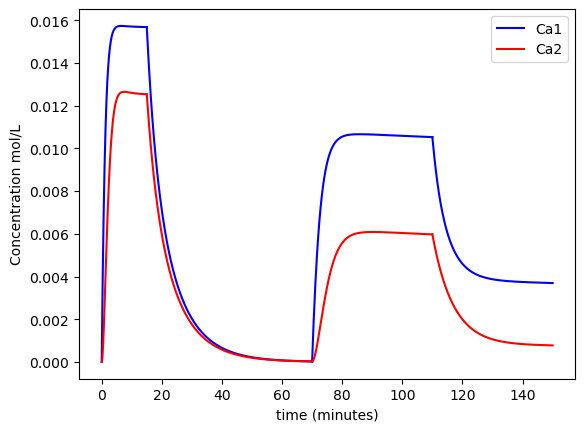

In [169]:
Q=Q1                           
tspan=np.linspace(0,t1,300)            
tper = (0,t1)                          
Ci = solve_ivp(molbal, tper, Co, dense_output = True, method = "LSODA")    
Ca1,Cb1,Ca2,Cb2 = Ci.sol(tspan)

Q=Q2                             
tspan2=np.linspace(t1,t2,300)            
tper2 = (t1,t2)
Co2=[Ca1[-1],Cb1[-1],Ca2[-1],Cb2[-1]]
Ci2=solve_ivp(molbal, tper2, Co2, dense_output = True, method = "LSODA")
Ca1_2,Cb1_2,Ca2_2,Cb2_2 = Ci2.sol(tspan2)

Q=Q3                      
tspan3=np.linspace(t2,t3,300)            
tper3 = (t2,t3)
Co3=[Ca1_2[-1],Cb1_2[-1],Ca2_2[-1],Cb2_2[-1]]
Ci3=solve_ivp(molbal, tper3, Co3, dense_output = True, method = "LSODA")
Ca1_3,Cb1_3,Ca2_3,Cb2_3 = Ci3.sol(tspan3)

Q=Q4                           
tspan4=np.linspace(t3,t4,300)            
tper4 = (t3,t4)
Co4=[Ca1_3[-1],Cb1_3[-1],Ca2_3[-1],Cb2_3[-1]]
Ci4=solve_ivp(molbal, tper4, Co4, dense_output = True, method = "LSODA")
Ca1_4,Cb1_4,Ca2_4,Cb2_4 = Ci4.sol(tspan4)

plt.figure(1)
plt.plot(tspan, Ca1, color='blue', label='Ca1')
plt.plot(tspan, Ca2, color='red', label='Ca2')
plt.plot(tspan2, Ca1_2, color='blue')
plt.plot(tspan2, Ca2_2, color='red')
plt.plot(tspan3, Ca1_3, color='blue')
plt.plot(tspan3, Ca2_3, color='red')
plt.plot(tspan4, Ca1_4, color='blue')
plt.plot(tspan4, Ca2_4, color='red')
plt.legend(loc='best')
plt.ylabel('Concentration mol/L') 
plt.xlabel('time (minutes)') 
plt.show() 

In [170]:
Vused=Q1*(t1)+Q2*(t2-t1)+Q3*(t3-t2)+Q4*(t4-t3)
Vused

2.9000000000000004